# Análisis exploratorio de datos (EDA)

In [1]:
library(tidyverse)
library(Amelia)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [18]:
df = read.csv("data/train.csv", header = TRUE)
head(df)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True


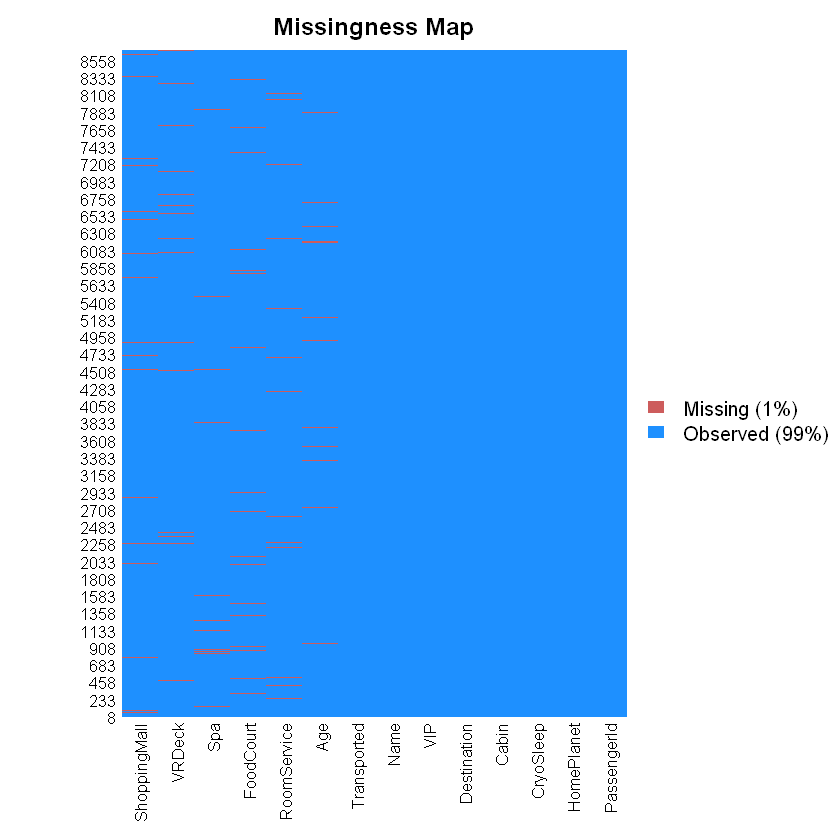

In [19]:
missmap(df)

In [20]:
print(table(df$HomePlanet))
print(table(df$Destination))
print(table(df$CryoSleep))
print(table(df$VIP))


        Earth Europa   Mars 
   201   4602   2131   1759 

                55 Cancri e PSO J318.5-22   TRAPPIST-1e 
          182          1800           796          5915 

      False  True 
  217  5439  3037 

      False  True 
  203  8291   199 


In [21]:
splitted = str_split(df$Cabin, '/', simplify = TRUE)

In [22]:
table(splitted[, 1])


        A    B    C    D    E    F    G    T 
 199  256  779  747  478  876 2794 2559    5 

In [23]:
table(splitted[, 3])


        P    S 
 199 4206 4288 

In [24]:
df = df %>% mutate(Cabin_deck = splitted[, 1], 
                   Cabin_num = as.integer(splitted[, 2]), 
                   Cabin_side = splitted[, 3]) %>% select(-Cabin)
head(df)

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0001_01,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
0005_01,Earth,False,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P


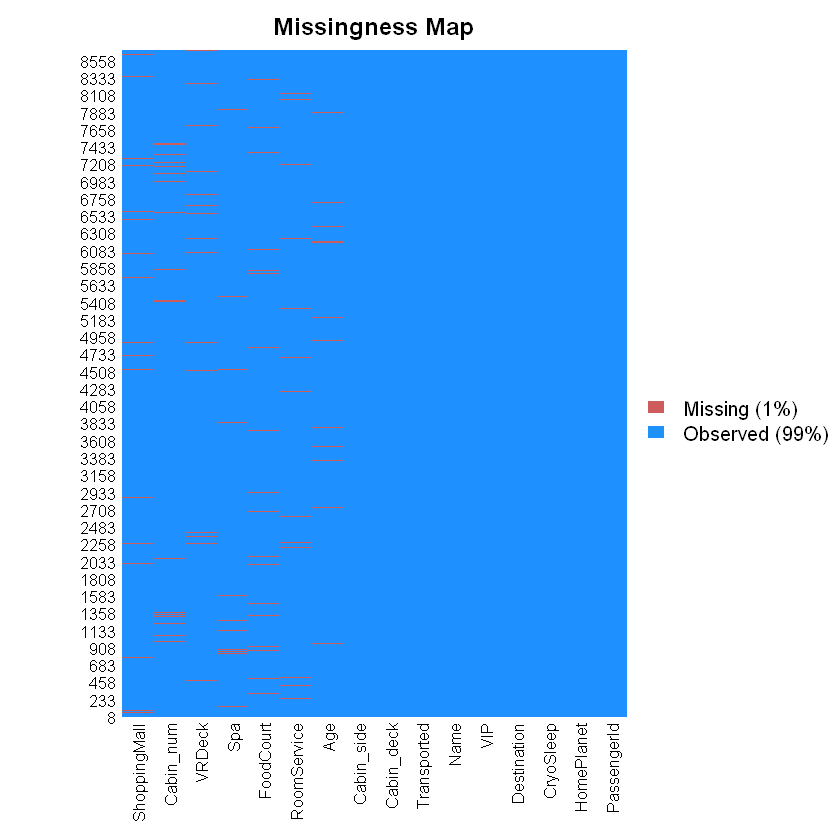

In [25]:
missmap(df)

In [30]:
df$Cabin_deck[df$Cabin_deck == ""] = NA
df$Cabin_num[df$Cabin_num == ""] = NA
df$Cabin_side[df$Cabin_side == ""] = NA
df$HomePlanet[df$HomePlanet == ""] = NA
df$Destination[df$Destination == ""] = NA
df$CryoSleep[df$CryoSleep == ""] = NA
df$VIP[df$VIP == ""] = NA

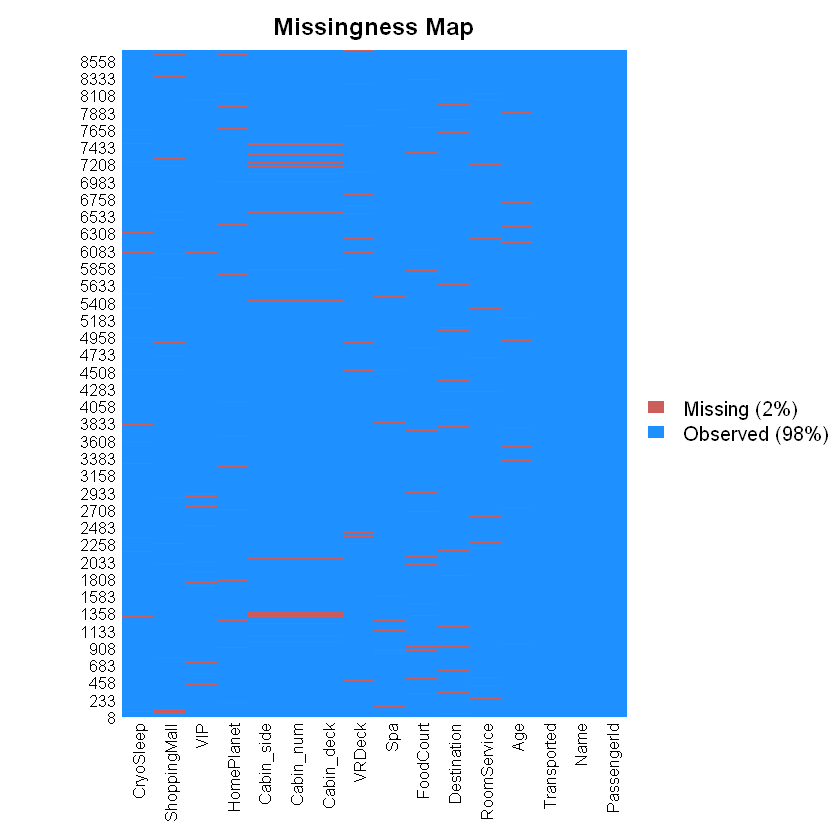

In [11]:
missmap(df)

In [94]:
# Porcentaje de filas completas
sum(complete.cases(df))/nrow(df)
# Ricardo: El porcentaje es muy bajo para poder descartar filas con valores perdidos, por lo que la imputación
# es necesaria, además de que tendremos valores perdidos en el conjunto de test como habíamos comentado.

[1] 0.7780973

In [12]:
mode_hp = (df %>% group_by(HomePlanet) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$HomePlanet
mode_cabin_deck = (df %>% group_by(Cabin_deck) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Cabin_deck
mode_cabin_side = (df %>% group_by(Cabin_side) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Cabin_side
mode_dest = (df %>% group_by(Destination) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$Destination
mode_cs = (df %>% group_by(CryoSleep) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$CryoSleep
mode_vip = (df %>% group_by(VIP) %>% summarize(n = n()) %>% na.omit %>% top_n(1))$VIP


Warning message:
"Factor `HomePlanet` contains implicit NA, consider using `forcats::fct_explicit_na`"Selecting by n
Selecting by n
Selecting by n
Warning message:
"Factor `Destination` contains implicit NA, consider using `forcats::fct_explicit_na`"Selecting by n
Warning message:
"Factor `CryoSleep` contains implicit NA, consider using `forcats::fct_explicit_na`"Selecting by n
Warning message:
"Factor `VIP` contains implicit NA, consider using `forcats::fct_explicit_na`"Selecting by n


In [13]:

df_mode = data.frame(mode_hp = mode_hp, mode_cabin_deck = mode_cabin_deck, mode_cabin_side = mode_cabin_side, mode_cs = mode_cs, mode_vip = mode_vip, mode_dest = mode_dest)
df_mode

mode_hp,mode_cabin_deck,mode_cabin_side,mode_cs,mode_vip,mode_dest
Earth,F,S,False,False,TRAPPIST-1e


In [43]:
df_imputed = df
df_imputed$Cabin_deck[is.na(df$Cabin_deck)] = mode_cabin_deck
df_imputed$Cabin_side[is.na(df$Cabin_side)] = mode_cabin_side
df_imputed$HomePlanet[is.na(df$HomePlanet)] = mode_hp
df_imputed$Destination[is.na(df$Destination)] = mode_dest
df_imputed$CryoSleep[is.na(df$CryoSleep)] = mode_cs
df_imputed$VIP[is.na(df$VIP)] = mode_vip

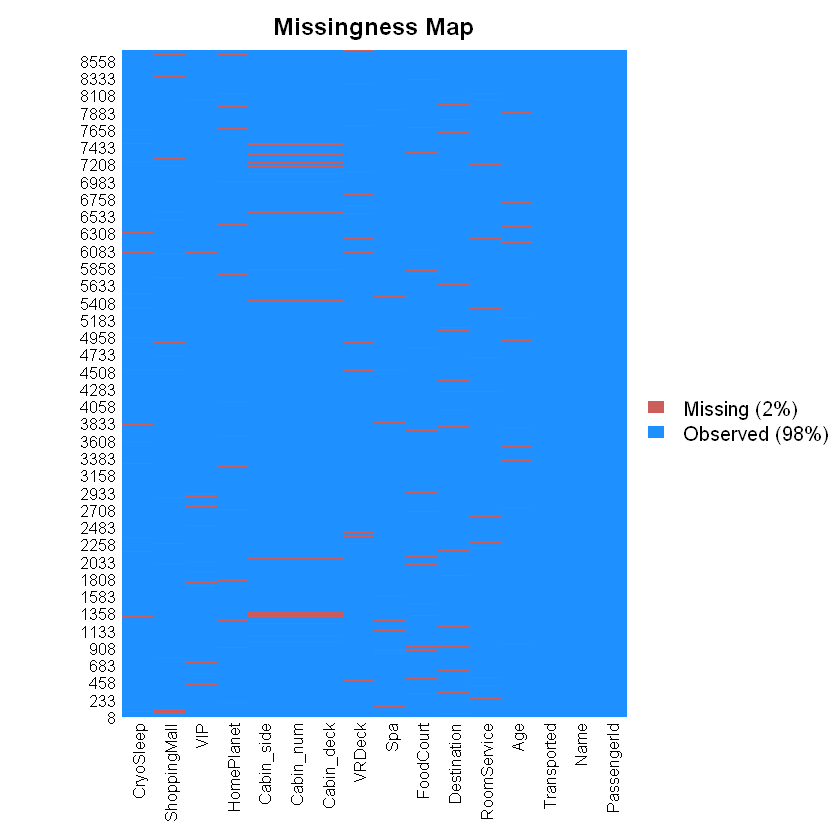

In [44]:
missmap(df)

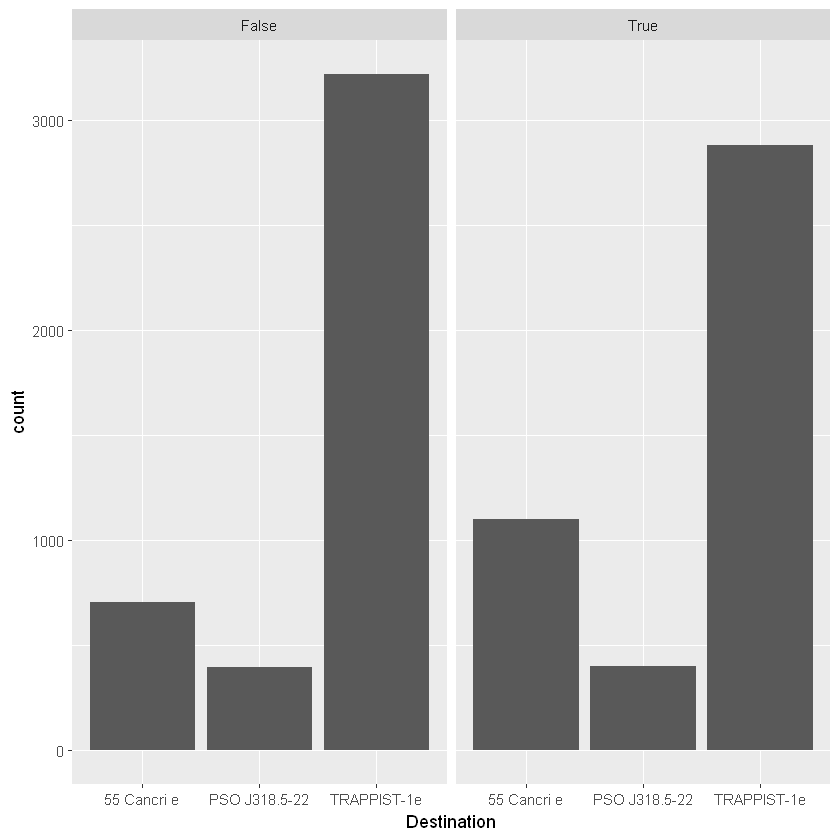

In [45]:
ggplot(df_imputed, aes(x = Destination)) +
    geom_bar() +
    facet_wrap(~Transported)

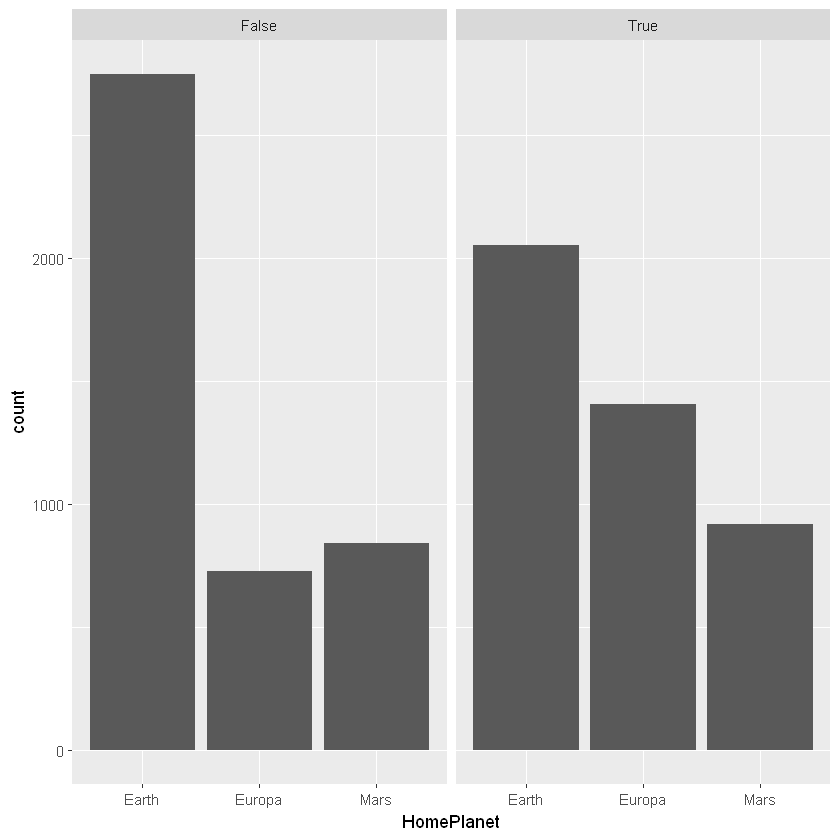

In [46]:
ggplot(df_imputed, aes(x = HomePlanet)) +
    geom_bar() +
    facet_wrap(~Transported)

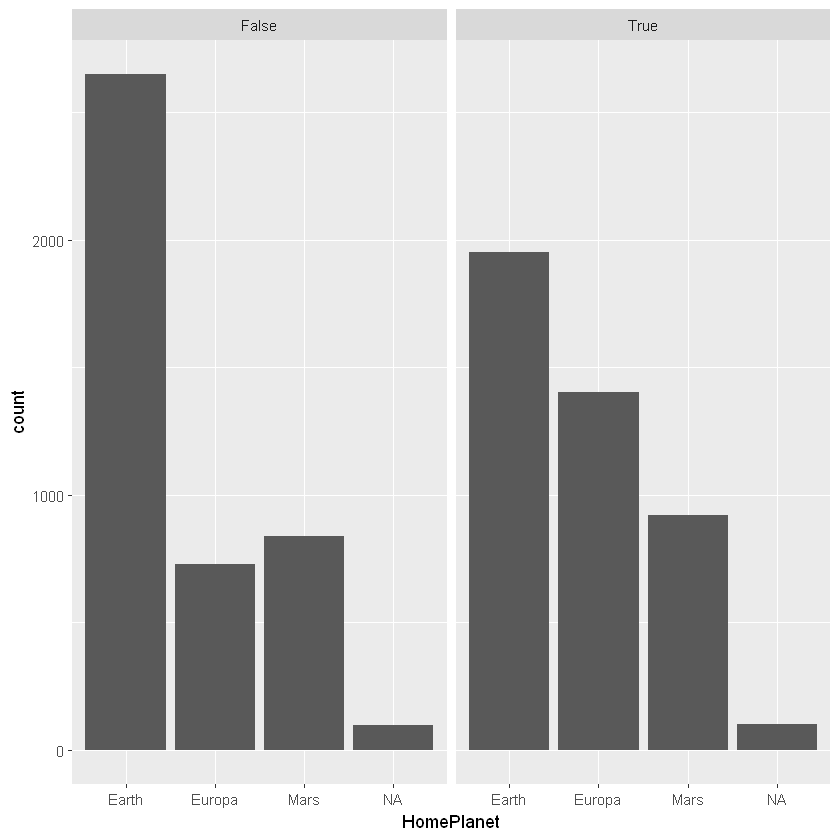

In [47]:
ggplot(df, aes(x = HomePlanet)) +
    geom_bar() +
    facet_wrap(~Transported)

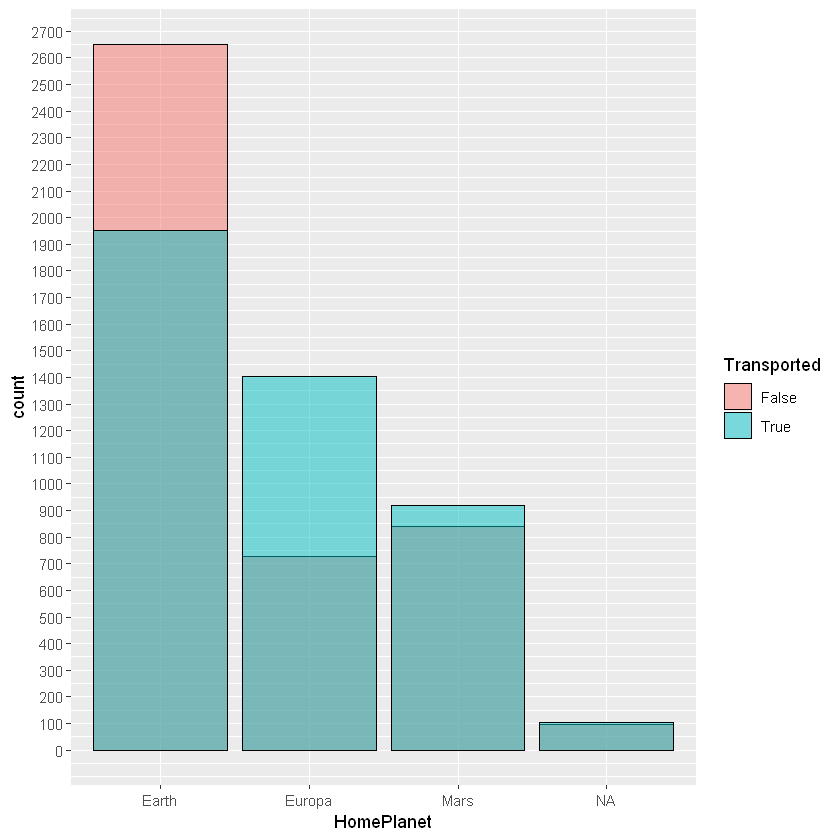

In [51]:
# Ricardo: parece que es más probable de ser transportado si un individuo es de otro planeta que no sea la Tierra,  
# aunque esta sea la categoría con mayor número de individuos, por lo que el planeta de procedencia puede ser una primera
# pista para la clasificación.
ggplot(df, aes(x = HomePlanet, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='identity') +
    scale_y_continuous(breaks = seq(0,3000,100))


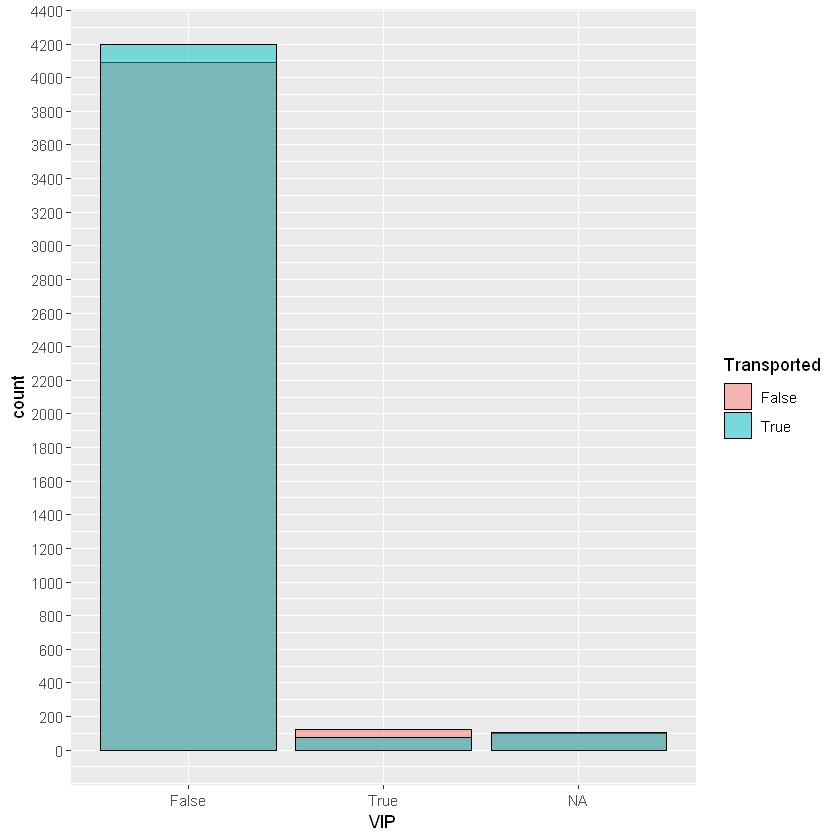

In [71]:

ggplot(df, aes(x = VIP, fill=Transported)) +
    geom_bar(color='black', alpha=0.5, position='identity') +
    scale_y_continuous(breaks = seq(0,5000,200))

Warning message:
"Removed 199 rows containing non-finite values (stat_density)."

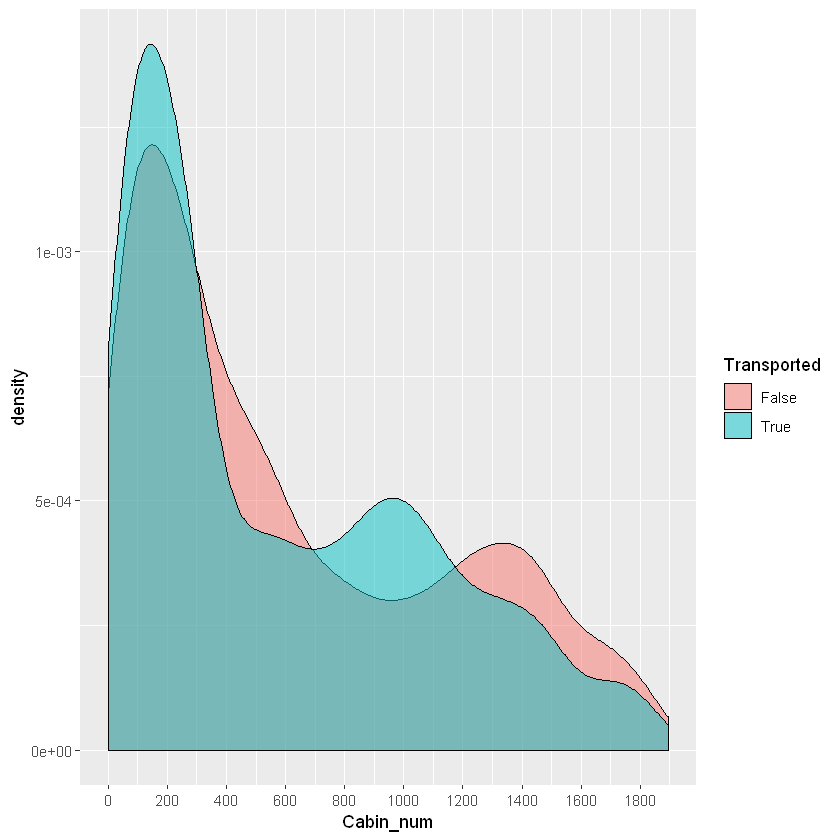

In [55]:
# Ricardo: ¿Por qué en el rango entre 800 y 1100 hay más transportados?

ggplot(df, aes(x = Cabin_num,fill=Transported)) +
    geom_density(alpha=0.5)+
scale_x_continuous(breaks = seq(0,1800,200))

Warning message:
"Removed 199 rows containing non-finite values (stat_count)."

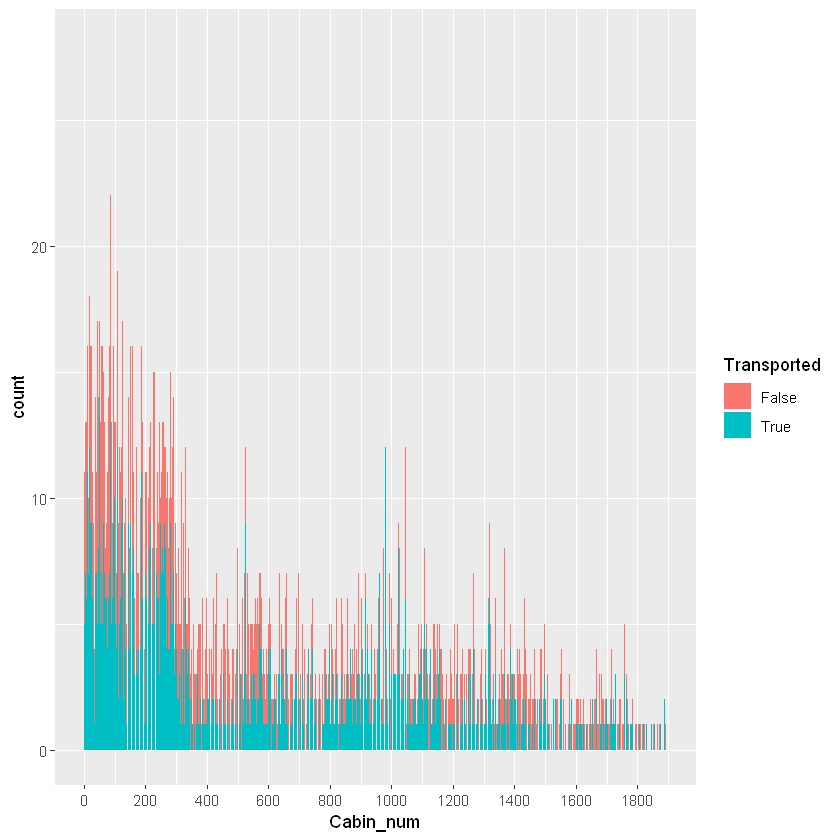

In [57]:
ggplot(df, aes(x = Cabin_num,fill=Transported)) +
    geom_bar()+
scale_x_continuous(breaks = seq(0,1800,200))

In [ ]:
######### CONTINUAR CON ANÁLISIS BIVARIABLE ###########

## Missing values en el conjunto de test

In [38]:
# Cargamos datos
df_test = read.csv("data/test.csv", header = TRUE)
head(df_test)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez
0027_01,Earth,False,F/7/P,TRAPPIST-1e,31,False,0,1615,263,113,60,Karlen Ricks


In [99]:
# Lo mismo que antes, dividimos la variable Cabin en sus componentes
splitted_test = str_split(df_test$Cabin, '/', simplify = TRUE)

In [100]:
df_test = df_test %>% mutate(Cabin_deck = splitted_test[, 1], 
                   Cabin_num = as.integer(splitted_test[, 2]), 
                   Cabin_side = splitted_test[, 3]) %>% select(-Cabin)
head(df_test)

PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_deck,Cabin_num,Cabin_side
0013_01,Earth,True,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,G,3,S
0018_01,Earth,False,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,F,4,S
0019_01,Europa,True,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,C,0,S
0021_01,Europa,False,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,C,1,S
0023_01,Earth,False,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,F,5,S
0027_01,Earth,False,TRAPPIST-1e,31,False,0,1615,263,113,60,Karlen Ricks,F,7,P


In [101]:
df_test$Cabin_deck[df_test$Cabin_deck == ""] = NA
df_test$Cabin_num[df_test$Cabin_num == ""] = NA
df_test$Cabin_side[df_test$Cabin_side == ""] = NA
df_test$HomePlanet[df_test$HomePlanet == ""] = NA
df_test$Destination[df_test$Destination == ""] = NA
df_test$CryoSleep[df_test$CryoSleep == ""] = NA
df_test$VIP[df_test$VIP == ""] = NA

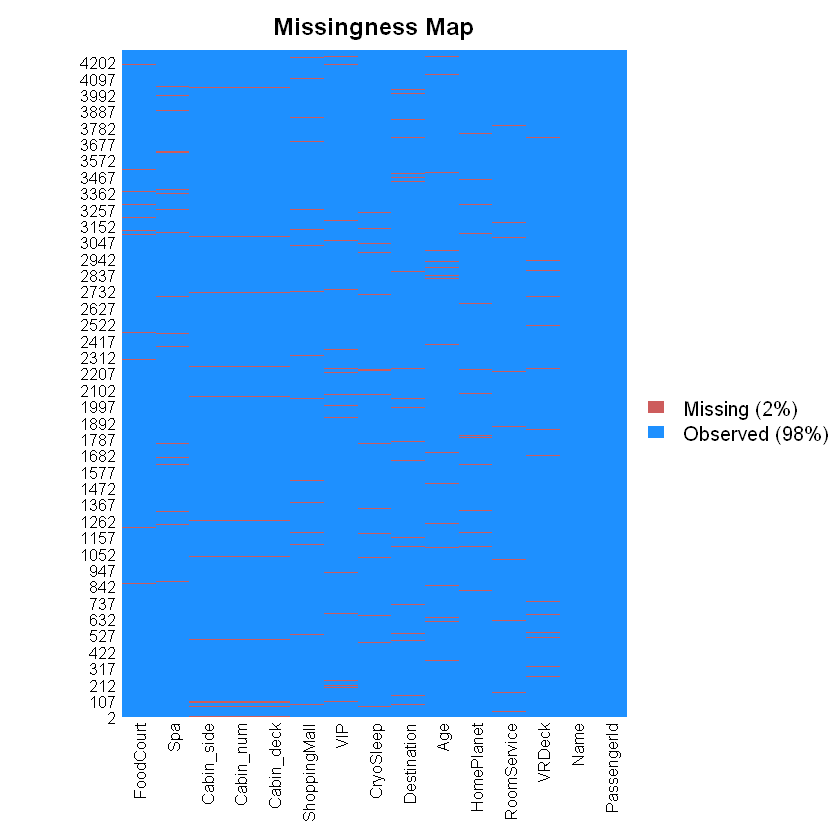

In [102]:
missmap(df_test)
# Ricardo: efectivamente hay valores perdidos en el conjunto de test

In [103]:
# Porcentaje de filas completas para el conjunto de test
sum(complete.cases(df_test))/nrow(df_test)

# Ricardo: la proporción de datos completos es muy parecida al conjunto de entrenamiento.

[1] 0.7844283

In [104]:
# Comentarios generales:

# Ricardo (28/12/2022):
# -Os he dejado algunos comentarios en los que he puesto mi nombre.
# -Creo que deberíamos dejar bonito el notebook para entregarlo, para ello igual nos conviene poner un apartado definiendo
# el problema y describiendo brevemente las variables, además de ir incluyendo los pasos que hemos seguido en Introducción a la 
# ciencia de datos como apartados. Igual no hacer un análisis tan exhaustivo, pero lo suficiente para que conozcamos 
# bien las variables. Aunque igual podemos utilizar este notebook como borrador.
# -Por otro lado propongo dejar esta celda al final del documento por si queréis ir añadiendo comentarios para el resto,
# incluyendo vuestro nombre y añadiendo la fecha para dejar como una especie de "registro" y así
# no saturamos el grupo de whats app